# Confidence Intervals  



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

spotify_population = pd.read_feather('datasets/spotify_2000_2020.feather')

spotify_sample = spotify_population.sample(1000, random_state=42)


Pop mean: 121.0799820914154
Sample mena: 121.019241
bootstrap mean: 121.057525524


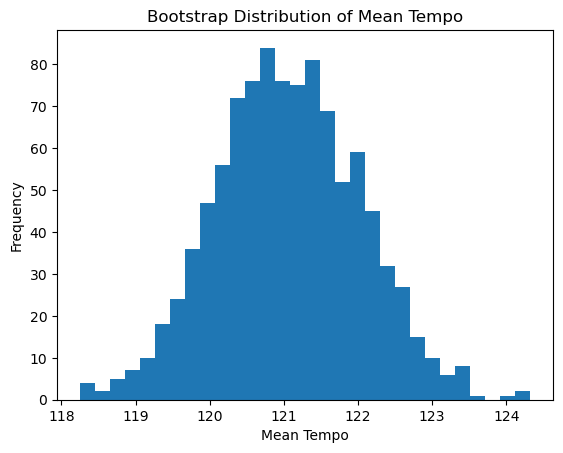

In [37]:
mean_population = spotify_population['tempo'].mean()
mean_sample = spotify_sample['tempo'].mean()


# Create an empty list to store bootstrap means
bootstrap_distribution = []

# Generate 1000 bootstrap resamples
for i in range(1000):
    # For each iteration:
    # 1. Sample with replacement (frac=1 means same size as original)
    # 2. Calculate mean of 'tempo' column
    # 3. Append to bootstrap_distribution list
    bootstrap_mean = np.mean(spotify_sample['tempo'].sample(frac=1, replace=True))
    bootstrap_distribution.append(bootstrap_mean)

mean_bootstrap_d = np.mean(bootstrap_distribution)

print(f'Pop mean: {mean_population}\nSample mena: {mean_sample}\nbootstrap mean: {mean_bootstrap_d}')

# The bootstrap_distribution list now contains 1000 sample means
# You can visualize it with a histogram
plt.hist(bootstrap_distribution, bins=30)
plt.title('Bootstrap Distribution of Mean Tempo')
plt.xlabel('Mean Tempo')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print(f'{lower_quant:.3f}, {upper_quant:.3f}')

119.220, 122.965


In [43]:
from scipy.stats import norm
# Find the mean and std dev of the bootstrap distribution
point_estimate = mean_bootstrap_d
standard_error = np.std(bootstrap_distribution, ddof = 1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, point_estimate, standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, point_estimate, standard_error)

# Print standard error method confidence interval
print(f'{lower_se:.3f}, {upper_se:.3f}')

119.159, 122.956


In [45]:
# Método de Error Estándar corregido
from scipy.stats import norm
import numpy as np

# Calcular estimador puntual y error estándar
point_estimate = mean_bootstrap_d
standard_error = np.std(bootstrap_distribution, ddof=1)

# Calcular z-score para 95% de confianza
z_score = norm.ppf(0.975)  # 1.96 para 95% de confianza

# Calcular límites del intervalo
lower_se = point_estimate - (z_score * standard_error)
upper_se = point_estimate + (z_score * standard_error)

print(f"Intervalo de confianza (Error Estándar): ({lower_se:.3f}, {upper_se:.3f})")

Intervalo de confianza (Error Estándar): (119.159, 122.956)
